# Hypothesen zu Ursachen großer QTTR-Veränderungen

## 1. Überblick
Im Rahmen des Projekts analysieren wir die Ursachen für große QTTR-Veränderungen und haben verschiedene Hypothesen formuliert, die unterschiedliche Dimensionen abdecken. Die Hypothesen sind in Kategorien unterteilt, um verschiedene Perspektiven auf die Daten zu ermöglichen und die Analyse effizienter zu gestalten. Jede Hypothese wird systematisch überprüft, um festzustellen, ob sie mit den vorliegenden Daten korreliert und welche anderen Faktoren dabei möglicherweise eine Rolle spielen könnten.

## 2. Kategorien und Hypothesen

### 2.1 Spielerische Entwicklung
- **Intensiviertes Training oder Vereinswechsel:**  
  Spieler:innen, die intensiver trainieren oder ihren Verein wechseln, könnten in einem besseren Umfeld oder mit neuen Trainingsmethoden schneller ihre Leistung steigern. Besonders wenn Spieler in ein stärkeres Umfeld kommen, könnte dies auch ihren Spielstil und ihre Spielqualität verändern. In solchen Fällen ist es oft schwierig zu quantifizieren, wie viel von der QTTR-Verbesserung tatsächlich auf das Training oder den Vereinswechsel zurückzuführen ist, da diese oft von anderen Faktoren beeinflusst werden (z. B. Motivation, Trainingsqualität).  
  **Erweiterung**: Eine genauere Analyse könnte sich auf den Vergleich der QTTR-Veränderungen vor und nach einem Vereinswechsel konzentrieren. Zusätzlich könnte man nach Spielern suchen, die von weniger erfolgreichen Vereinen zu Top-Clubs gewechselt sind, um festzustellen, ob es einen signifikanten Anstieg in der Leistung gibt.

- **Altersbedingte Entwicklung:**  
  Jüngere Spieler:innen (insbesondere im Bereich von 10-18 Jahren) durchlaufen eine Phase schnellerer Verbesserungen, was in einem steilen Anstieg ihrer QTTR-Werte resultiert. Bei älteren Spielern (über 45) könnte es zu einem Leistungsabfall kommen, der sich in einem Negativtrend der QTTR-Werte widerspiegelt. Die Frage ist jedoch, ob dieser Rückgang nur durch das Alter bedingt ist oder ob Faktoren wie reduzierte Trainingsintensität oder weniger Spielbeteiligung eine größere Rolle spielen.  
  **Erweiterung**: Eine genauere Betrachtung der Altersgruppen könnte helfen, zu verstehen, ob sich ein Trend über die Jahre etabliert oder ob es an bestimmten Phasen im Leben eines Spielers liegt (z. B. Übergang von der Jugend zu den Erwachsenen). Dies könnte auch mit der Spielanzahl korrelieren.

### 2.2 Berechnungstechnische Ursachen
- **Inaktivitätsabzug:**  
  Lange Pausen oder Inaktivität führen in vielen Sportarten zu Abzügen im Rating. Dies ist auch bei QTTR der Fall, da weniger gespielte Matches zu einer niedrigeren Bewertung führen. Wenn der Spieler dann wieder zurückkehrt, kann dies zu einer großen Schwankung führen, wenn der QTTR-Wert durch weniger aktuelle Matches nicht genau widergespiegelt wird. Eine interessante Frage wäre, ob Spieler:innen, die lange inaktiv waren, im Durchschnitt stärkere oder schwächere Rückkehrer sind.  
  **Erweiterung**: Eine detaillierte Analyse könnte untersuchen, wie sich der QTTR-Veränderungstrend nach der Rückkehr von einer Inaktivitätsphase entwickelt. Es wäre auch spannend zu prüfen, ob diese Spieler:innen im Vergleich zu Spielern ohne Pausen größere Sprünge machen oder eher stagnieren.

- **Geringe Spielanzahl:**  
  Ein geringer Spielumfang führt zu einer größeren Unsicherheit im Rating. Spieler:innen, die nur wenige Partien spielen, erleben oft größere Schwankungen im QTTR-Wert, da jeder einzelne Verlust oder Gewinn einen höheren Einfluss auf die Gesamtbewertung hat.  
  **Erweiterung**: Die Analyse könnte tiefer in den Zusammenhang zwischen der Anzahl der gespielten Spiele und der Varianz im QTTR-Wert eintauchen. Eventuell könnte man Schwellenwerte definieren, ab wann ein Spieler als "wenig aktiv" gilt, und untersuchen, wie stark dieser Einfluss auf die gesamte Spielertabelle ist.

- **Einseitige Gegnerauswahl:**  
  Wenn Spieler:innen überwiegend gegen viel stärkere oder schwächere Gegner spielen, kann dies zu einer verzerrten Einschätzung ihres tatsächlichen Niveaus führen. Spieler, die oft gegen stärkere Gegner verlieren, könnten in ihrer Bewertung sinken, auch wenn sie selbst eine gute Leistung zeigen, während Spieler, die viele einfachere Gegner besiegen, überschätzt werden könnten.  
  **Erweiterung**: Man könnte auch eine Korrelation zwischen der Gegnerstärke und den größten QTTR-Veränderungen untersuchen. Wenn dies der Fall ist, könnte eine detaillierte Analyse des Gegnermixes Aufschluss darüber geben, wie die Verteilung von Gegnern in einem bestimmten Zeitraum die Gesamtbewertung beeinflusst.

### 2.3 Datenqualität
- **Fehlerhafte Spielerzuordnung:**  
  Fehler bei der Zuordnung von Spielern zu falschen Namen oder Identitäten können die Analyse verzerren. Zum Beispiel könnten zwei Spieler:innen mit ähnlichen Namen oder Geburtsdaten fälschlicherweise als eine Person betrachtet werden, was zu einer unerklärlich hohen oder niedrigen QTTR-Veränderung führt.  
  **Erweiterung**: Um Fehler durch falsche Zuordnungen zu untersuchen, könnte man eine genauere Datenbereinigung vornehmen und darauf achten, wie viele potenziell problematische Datensätze existieren. Wenn der Verdacht auf Fehler in der Zuordnung besteht, könnte man auch manuell überprüfte Datensätze erstellen, um den Einfluss auf das Ergebnis zu prüfen.

- **Falsche Spielmeldungen:**  
  Die Korrektheit der Spielmeldungen ist ein weiterer kritischer Punkt. Wenn Ergebnisse falsch gemeldet oder zugewiesen werden, kann dies zu falschen QTTR-Werten führen.  
  **Erweiterung**: Eine Möglichkeit, dies zu untersuchen, wäre, die statistischen Verteilungen der Spielgewinne und -verluste auf Plausibilität zu überprüfen und mit der allgemeinen Leistungsentwicklung der Spieler:innen zu vergleichen.

### 2.4 Wettbewerbskontext
- **Ligawechsel:**  
  Ein Wechsel in eine stärkere oder schwächere Liga führt in vielen Fällen zu einer schnellen Anpassung des QTTR-Werts. Spieler:innen, die in stärkere Ligen aufsteigen, könnten gegen härtere Gegner spielen und dadurch ihre Leistung drastisch steigern. Dies ist eine der häufigsten Ursachen für große Veränderungen.  
  **Erweiterung**: Eine vertiefte Analyse könnte sich darauf konzentrieren, welche Ligenwechsel besonders signifikant sind und ob diese Veränderungen auch in bestimmten Zeiträumen (z. B. vor oder nach der Saison) besonders ausgeprägt sind.

- **Turniere:**  
  Spieler:innen, die an vielen Turnieren teilnehmen, haben die Möglichkeit, ihre QTTR-Bewertung durch häufige Partien zu verbessern oder zu verschlechtern. Hierbei könnte sich ein Trend zeigen, dass ein Turnierspieler durch häufiges Spielen eine genauere Einschätzung seines Niveaus erreicht.  
  **Erweiterung**: Eine interessante Untersuchung wäre, inwiefern die Teilnahme an Turnieren die Schwankungen des QTTR-Werts beeinflusst und ob Spieler, die regelmäßig an Turnieren teilnehmen, im Durchschnitt höhere oder stabilere Bewertungen haben.

### 2.5 Persönliche Faktoren
- **Verletzungen/Krankheiten:**  
  Langfristige Verletzungen oder Krankheiten können das Leistungsniveau der Spieler:innen beeinträchtigen, was sich in einer Abnahme der QTTR-Bewertung niederschlagen kann.  
  **Erweiterung**: Hier könnte eine genauere Untersuchung des Zusammenhangs zwischen Verletzungszeiten und der Entwicklung des QTTR-Werts sinnvoll sein. Dies könnte durch eine Analyse von Spielern erfolgen, bei denen medizinische Informationen vorliegen oder durch Interviews.

- **Mentale Faktoren:**  
  Motivation und mentale Stärke sind Schlüsselfaktoren im Sport. Private Probleme, Stress oder eine geringe Motivation können dazu führen, dass ein:e Spieler:in schlechter spielt, was sich wiederum negativ auf den QTTR-Wert auswirkt.  
  **Erweiterung**: Eine interessante Frage wäre, ob es auffällige Muster in den Daten gibt, die mit mentalen Blockaden oder Motivationsproblemen in Verbindung gebracht werden können. Dies könnte mit anderen Faktoren wie der Trainingshäufigkeit oder der Spielbeteiligung kombiniert werden, um mentale Einflüsse zu messen.

## 3. Priorisierung

| Hypothese                                  | Kategorie               | Priorität | Begründung                                                  |
|--------------------------------------------|-------------------------|-----------|-------------------------------------------------------------|
| Inaktivitätsabzug                          | Berechnung/Modell       | Hoch      | Einfach nachzuvollziehen, starker Einfluss                 |
| Ligawechsel                                | Wettbewerbskontext      | Hoch      | Gut messbar, realistischer Einfluss                        |
| Geringe Spielanzahl                         | Berechnung/Modell       | Hoch      | Führt zu starker Schwankung, datenbasiert überprüfbar      |
| Intensiviertes Training                     | Spielerische Entwicklung| Mittel    | Plausibel, aber schwer messbar                             |
| Fehlerhafte Spielerzuordnung               | Datenqualität           | Mittel    | Möglich, aber schwer zu validieren                         |
| Verletzung / Krankheit                     | Persönliche Faktoren    | Niedrig   | Einflussreich, aber kaum dokumentiert                      |

## 4. Fazit
Durch die kritische Auseinandersetzung mit den Ursachen großer QTTR-Veränderungen und die systematische Priorisierung dieser Hypothesen sollen klare Analyseziele formuliert werden, die sowohl theoretisch als auch praktisch von Bedeutung sind. Die nächsten Schritte in der empirischen Untersuchung werden darin bestehen, die zugrunde liegenden Datentrends zu analysieren und zu prüfen, welche Hypothesen mit den vorliegenden Daten am stärksten korrelieren.


In [68]:
import pandas as pd

# CSV-Datei laden
df = pd.read_csv('ttr_entwicklung_ohne_nall_erweitert.csv')

# Beispiel für die Berechnung der Veränderung im QTTR zwischen Q1 2024 und Q1 2025
df['Q-TTR_dif_24_Q1-25_Q1'] = df['TTR_Q1_2025'] - df['TTR_Q1_2024']

# Die 100 Spieler mit den größten Veränderungen finden
top_100_players = df.nlargest(100, 'Q-TTR_dif_24_Q1-25_Q1')

# Filtere die Spieler mit den größten Veränderungen
top_100_players = df.nlargest(100, 'Q-TTR_dif_24_Q1-25_Q1')

# Untersuche mögliche Ursachen, z.B. Kumulierte Inaktivitätsabzüge, Vereinswechsel, etc.
# Überprüfe ob es einen Zusammenhang zwischen Inaktivitätsabzug und TTR-Veränderung gibt
correlation_inaktivitaet_ttr = top_100_players[['Kumulierte Inaktivitätsabzüge', 'Q-TTR_dif_24_Q1-25_Q1']].corr()

# Vereinswechsel: Beispielhafte Untersuchung der 'Verein' Spalte (ob es Unterschiede zwischen den Spielern gibt)
# Hier nehmen wir an, dass wir die Spieler mit Vereinswechsel durch einen Vergleich der 'Verein' Spalten identifizieren können
top_100_players['Vereinswechsel'] = top_100_players['Verein'].shift(-1) != top_100_players['Verein']

# Zusammenfassung der wichtigsten Spalten für weitere Analysen
top_100_players[['Nachname', 'Vorname', 'Q-TTR_dif_24_Q1-25_Q1', 'Kumulierte Inaktivitätsabzüge', 'Verein', 'Vereinswechsel']]




,Nachname,Vorname,Q-TTR_dif_24_Q1-25_Q1,Kumulierte Inaktivitätsabzüge,Verein,Vereinswechsel
1719,Kim,Haneul,493.0,0,South Korea (Republic),True
11447,Petersen,Mieke,493.0,0,TSV Wiedingharde,True
9411,Wichmann,Daniel,381.0,0,TTC Sindorf,True
11323,Klinge,Sam,366.0,0,TTC Ramsharde,True
11160,Brzezinski,Lennie,361.0,0,TS Einfeld Neumünster,True
...,...,...,...,...,...,...
3905,Carrasco,Jacinta,183.0,0,Chile,True
4090,Ladino,Catalina,183.0,0,Colombia,True
4128,Mulye,Neil,183.0,0,India,True
4816,Ovando,Millaray,183.0,0,Chile,True


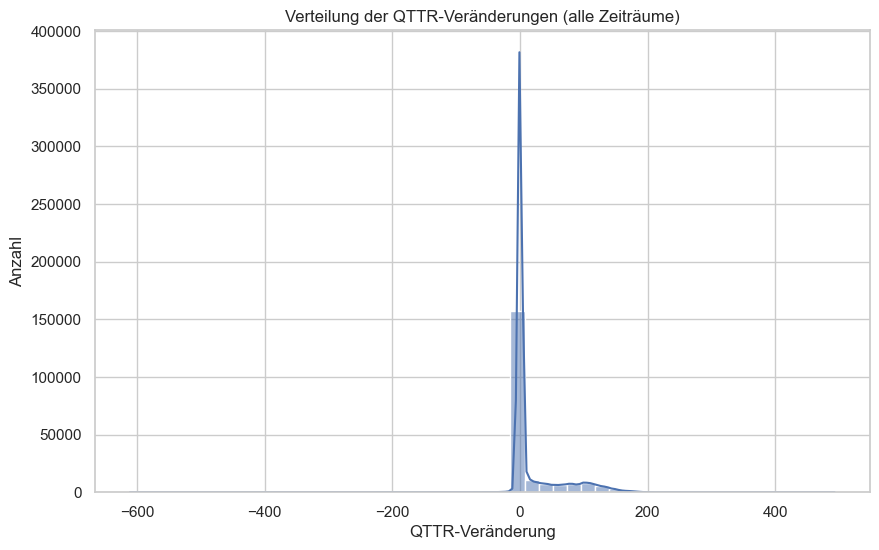

None


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden (Pfad anpassen, falls nötig)
df = pd.read_csv('ttr_entwicklung_ohne_nall_erweitert.csv')

# Relevante QTTR-Differenzspalten
change_cols = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]

# Histogramm der QTTR-Veränderungen
all_changes = pd.concat([df[col] for col in change_cols], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(all_changes.dropna(), bins=50, kde=True)
plt.title('Verteilung der QTTR-Veränderungen (alle Zeiträume)')
plt.xlabel('QTTR-Veränderung')
plt.ylabel('Anzahl')
plt.grid(True)
plt.show()

# Berechne maximale absolute Veränderung + zugehörigen Zeitraum
df['max_abs_change'] = df[change_cols].abs().max(axis=1)

# Zeitraum ermitteln, in dem die maximale Veränderung auftrat
df['max_change_value'] = df[change_cols].apply(lambda row: row[row.abs() == row.abs().max()].values[0], axis=1)
df['max_change_period'] = df[change_cols].apply(lambda row: row.abs().idxmax(), axis=1)

# Top 300 Spieler mit größter Veränderung
top_300 = df.nlargest(300, 'max_abs_change')

# Schöne Tabelle mit Namen, Zeitraum und Veränderung
result_table = top_300[['Nachname', 'Vorname', 'max_change_period', 'max_change_value', 'max_abs_change']].copy()
result_table = result_table.rename(columns={
    'Nachname': 'Nachname',
    'Vorname': 'Vorname',
    'max_change_period': 'Zeitraum',
    'max_change_value': 'QTTR-Veränderung',
    'max_abs_change': 'QTTR-Veränderung (absolut)'
})

# Optional: sortieren
result_table = result_table.sort_values(by='QTTR-Veränderung (absolut)', ascending=False)

# Ausgabe (Beispiel)
print(result_table.to_csv('300_größten_änderungen'))  # oder result_table.to_csv(...) zum Export


In [70]:
qttr_cols = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]
df['max_abs_change'] = df[qttr_cols].abs().max(axis=1)
df['große_änderung'] = df['max_abs_change'] > 200


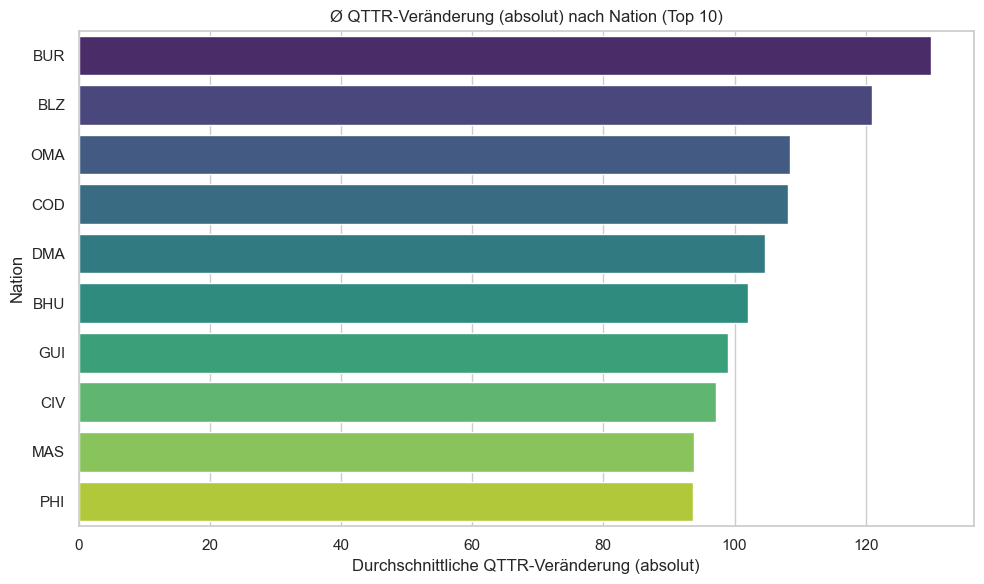

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mittelwert der absoluten Veränderung pro Nation
nation_stats = df.groupby('Nation')['max_abs_change'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=nation_stats.values, y=nation_stats.index, palette='viridis')
plt.title('Ø QTTR-Veränderung (absolut) nach Nation (Top 10)')
plt.xlabel('Durchschnittliche QTTR-Veränderung (absolut)')
plt.ylabel('Nation')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


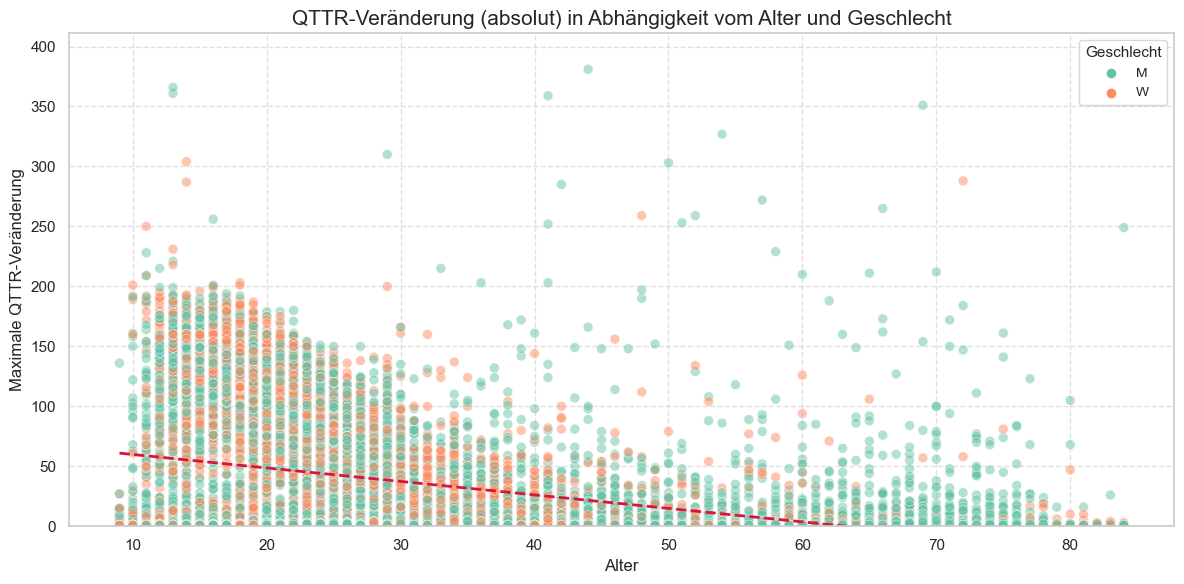

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Make sure your DataFrame `df` already exists, e.g. via pd.read_csv()

# Convert Geburtsdatum to datetime and calculate Alter
df['Geburtsdatum'] = pd.to_datetime(df['Geburtsdatum'], errors='coerce')
df['Alter'] = (pd.to_datetime("2025-01-01") - df['Geburtsdatum']).dt.days // 365

# Optional: create 'max_abs_change' if it doesn't exist
if 'max_abs_change' not in df.columns:
    # Example: use absolute max of all quarterly differences (adjust as needed)
    df['max_abs_change'] = df[[
        'Q-TTR_dif_24_Q1-25_Q1',
        'Q-TTR_dif_24_Q1-24_Q3',
        'Q-TTR_dif_24_Q1-24_Q2',
        'Q-TTR_dif_24_Q2-24_Q3',
        'Q-TTR_dif_24_Q3-24_Q4',
        'Q-TTR_dif_24_Q4-25_Q1'
    ]].abs().max(axis=1)

# Filter for reasonable ages and changes
df_filtered = df[
    (df['Alter'] > 8) & (df['Alter'] < 85) &
    (df['max_abs_change'] < 400)
]

# Set seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='Alter',
    y='max_abs_change',
    hue='Geschlecht',
    palette='Set2',
    alpha=0.5,
    s=50
)

# Add regression line (overall trend)
sns.regplot(
    data=df_filtered,
    x='Alter',
    y='max_abs_change',
    scatter=False,
    color='crimson',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# Title and labels
plt.title("QTTR-Veränderung (absolut) in Abhängigkeit vom Alter und Geschlecht", fontsize=15)
plt.xlabel("Alter", fontsize=12)
plt.ylabel("Maximale QTTR-Veränderung", fontsize=12)
plt.legend(title='Geschlecht', title_fontsize=11, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.ylim(0, df_filtered['max_abs_change'].max() + 30)

plt.show()


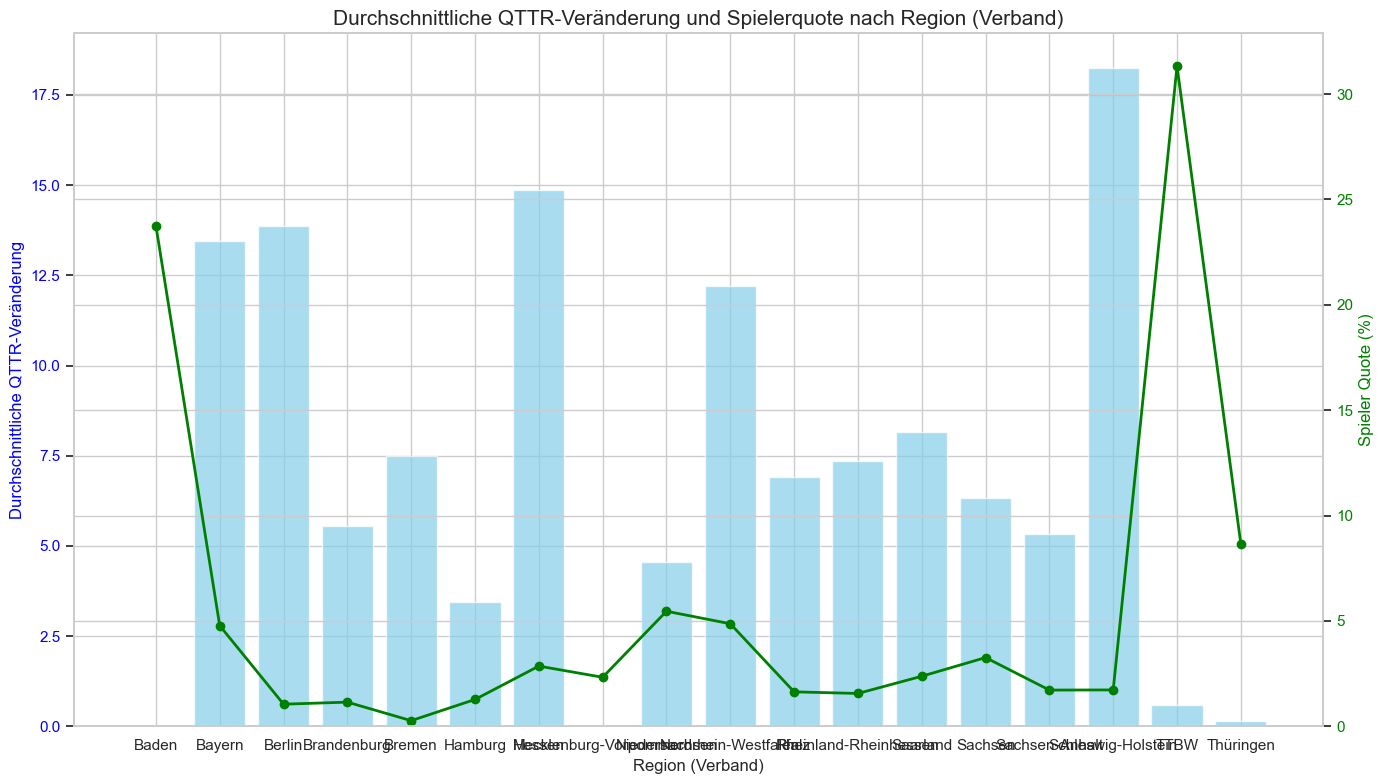

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter out 'Ausland' from 'Verband' column
df_german_regions = df[df['Verband'] != 'Ausland']

# Step 2: Calculate the average QTTR change by region (Verband)
region_change = df_german_regions.groupby('Verband')['Total_QTTR_Change'].mean().sort_values(ascending=False)

# Step 3: Count the number of players per region
region_count = df_german_regions.groupby('Verband')['InterneNr'].count()

# Step 4: Calculate the ratio (players per region / total players in all German regions)
total_players = region_count.sum()
region_ratio = (region_count / total_players) * 100

# Step 5: Create a new DataFrame to hold both metrics: average QTTR change and player ratio
region_stats = pd.DataFrame({
    'Average_QTTR_Change': region_change,
    'Player_Ratio (%)': region_ratio
})

# Step 6: Plotting both metrics in a bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for average QTTR change
bars = ax1.bar(region_stats.index, region_stats['Average_QTTR_Change'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Region (Verband)', fontsize=12)
ax1.set_ylabel('Durchschnittliche QTTR-Veränderung', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis for the player ratio
ax2 = ax1.twinx()
ax2.plot(region_stats.index, region_stats['Player_Ratio (%)'], color='green', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Spieler Quote (%)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Fix y-axis limits to start from 0 for both axes
ax1.set_ylim(bottom=0)  # Set the bottom of the first y-axis (bar chart) to 0
ax2.set_ylim(bottom=0)  # Set the bottom of the second y-axis (line chart) to 0

# Title and layout
plt.title('Durchschnittliche QTTR-Veränderung und Spielerquote nach Region (Verband)', fontsize=15)
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels 90 degrees for better readability
plt.tight_layout()

plt.show()


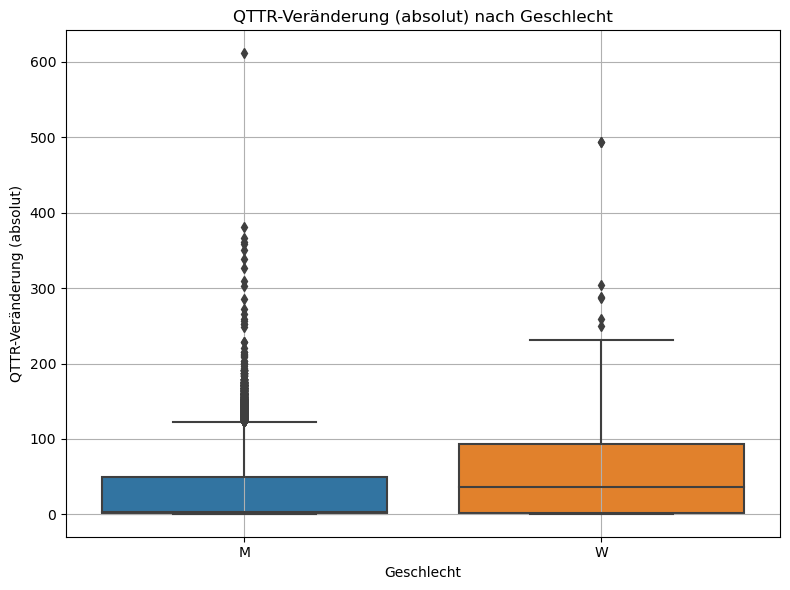

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Geschlecht', y='max_abs_change')
plt.title('QTTR-Veränderung (absolut) nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('QTTR-Veränderung (absolut)')
plt.grid(True)
plt.tight_layout()
plt.show()


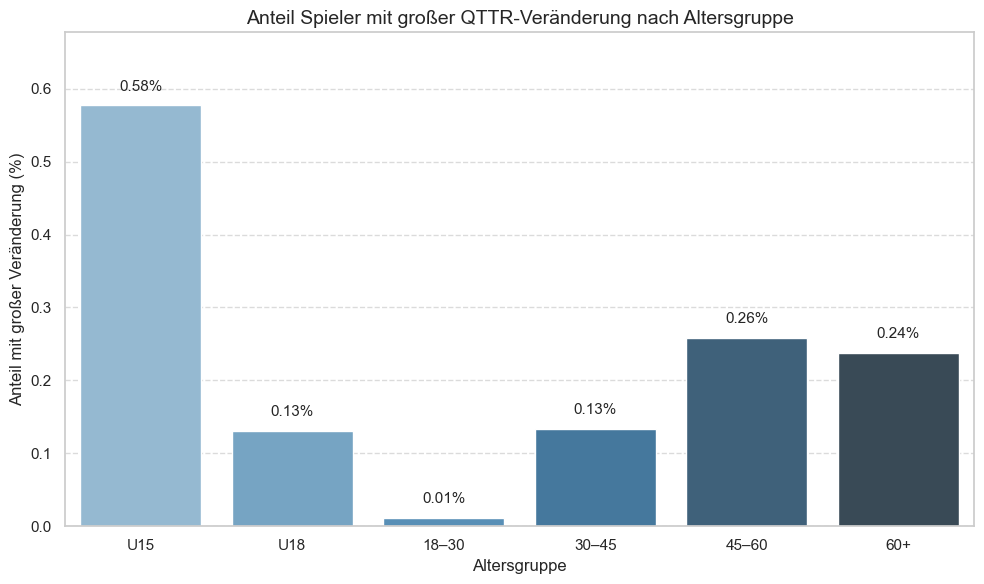

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x=group_stats_percent.index,
    y=group_stats_percent.values,
    palette="Blues_d"
)

# Titles and labels
plt.title("Anteil Spieler mit großer QTTR-Veränderung nach Altersgruppe", fontsize=14)
plt.xlabel("Altersgruppe", fontsize=12)
plt.ylabel("Anteil mit großer Veränderung (%)", fontsize=12)

# Add exact value labels on top of bars
for index, value in enumerate(group_stats_percent.values):
    plt.text(index, value + 0.02, f"{value:.2f}%", ha='center', fontsize=11)

# Y-axis tweaks for better visual
plt.ylim(0, max(group_stats_percent.values) + 0.1)  # set upper limit with padding
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])     # adjust tick marks manually if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate total QTTR change
df['Total_QTTR_Change'] = df['TTR_Q1_2025'] - df['TTR_Q1_2024']

# Get top 10 improvers
top_improvers = df.sort_values('Total_QTTR_Change', ascending=False).head(10)
print("Top 10 Improvers:")
print(top_improvers[['Vorname', 'Nachname', 'Nation', 'Total_QTTR_Change', 'TTR_Q1_2024', 'TTR_Q1_2025']])

# Get top 10 decliners
top_decliners = df.sort_values('Total_QTTR_Change').head(10)
print("\nTop 10 Decliners:")
print(top_decliners[['Vorname', 'Nachname', 'Nation', 'Total_QTTR_Change', 'TTR_Q1_2024', 'TTR_Q1_2025']])


Top 10 Improvers:
       Vorname    Nachname Nation  Total_QTTR_Change  TTR_Q1_2024  TTR_Q1_2025
11447    Mieke    Petersen    GER              493.0        768.0       1261.0
1719    Haneul         Kim    KOR              493.0       1885.0       2378.0
9411    Daniel    Wichmann    GER              381.0        995.0       1376.0
11323      Sam      Klinge    GER              366.0        825.0       1191.0
11160   Lennie  Brzezinski    GER              361.0        825.0       1186.0
6335    Lauras      Butkus    LTU              359.0       1310.0       1669.0
14254  Dietmar      Brandl    GER              339.0       1532.0       1871.0
4241   Andreas      Schein    GER              327.0       1542.0       1869.0
10464  Hendrik     Ziegler    GER              303.0        900.0       1203.0
10831  Marlene      Volmer    GER              288.0        856.0       1144.0

Top 10 Decliners:
           Vorname          Nachname Nation  Total_QTTR_Change  TTR_Q1_2024  \
1868   Numa Mar

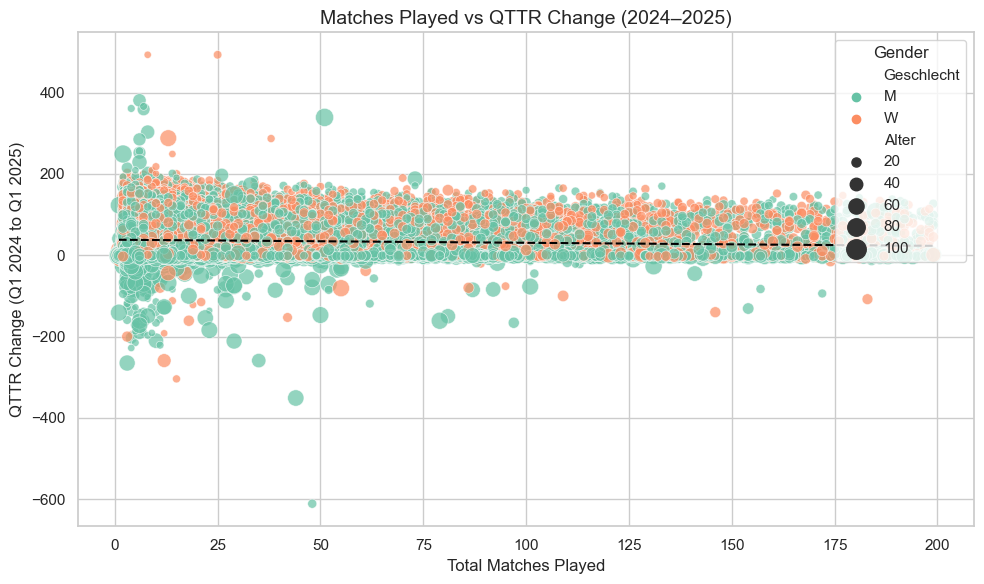

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern theme
sns.set(style="whitegrid")

# Optional: filter out extreme outliers for cleaner view
df_filtered = df[df['Anzahl Einzel gesamt'] < 200]  # or adjust as needed

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_filtered,
    x='Anzahl Einzel gesamt',
    y='Total_QTTR_Change',
    hue='Geschlecht',  # Adds color by gender
    size='Alter',      # Size points by age (optional)
    alpha=0.7,
    palette='Set2',
    sizes=(20, 200)
)

# Trendline (optional, for interpretability)
sns.regplot(
    data=df_filtered,
    x='Anzahl Einzel gesamt',
    y='Total_QTTR_Change',
    scatter=False,
    color='black',
    line_kws={"linewidth": 1.5, "linestyle": "dashed"}
)

plt.title("Matches Played vs QTTR Change (2024–2025)", fontsize=14)
plt.xlabel("Total Matches Played", fontsize=12)
plt.ylabel("QTTR Change (Q1 2024 to Q1 2025)", fontsize=12)
plt.legend(title="Gender", loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

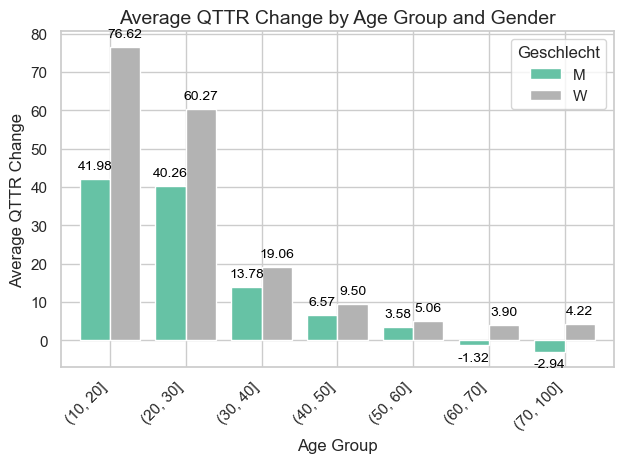

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the pivot table
df['AgeGroup'] = pd.cut(df['Alter'], bins=[10,20,30,40,50,60,70,100])
pivot = df.pivot_table(values='Total_QTTR_Change', index='AgeGroup', columns='Geschlecht', aggfunc='mean')

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the data with a better color palette
pivot.plot(kind='bar', colormap='Set2', width=0.8)

# Add values on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', padding=5, fontsize=10, color='black')

# Add labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average QTTR Change', fontsize=12)
plt.title('Average QTTR Change by Age Group and Gender', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid clipping and make everything fit
plt.tight_layout()

plt.show()
